# Content

- [Estimated Distances](#1.-Estimated-Distances)
    - [Limit 0.5](#1.1.-Limit-0.5)
    - [Limit 2.0](#1.2.-Limit-2.0)
    - [Limit 2.5](#1.3.-Limit-2.5)
    - [Limit 3.14](#1.4.-Limit-3.14)
- [Perfect Distances + Variance 0.8](#2.-Perfect-Distances-+-Variance-0.8)
    - [Limit 0.5](#2.1.-Limit-0.5)
    - [Limit 2.5](#2.2.-Limit-2.5)
- [Perfect Distances + Variance 0.2](#3.-Perfect-Distances-+-Variance-0.2)
    - [Limit 0.5](#3.1.-Limit-0.5)
    - [Limit 2.5](#3.2.-Limit-2.5)

In [1]:
import sys
sys.path.append("..")
import numpy as np

from cryoem.plots import plot_images, plot_iterations_polar_plot, plot_iterations_rotvec, plot_euclidean_space
from cryoem.conversions import quaternion2euler
from cryoem.angle_alignment import training_angle_alignment, update_quaternion
from tensorflow.keras.optimizers import Adagrad, Ftrl

In [2]:
projections = np.load("3-reconstruction/data/projections.npy")
angles_true = np.load("3-reconstruction/data/angles_true.npy")

---

# 1. Estimated Distances

## 1.1. Limit 0.5

In [3]:
data = np.load("3-reconstruction/data/angle_recovery_estimated_le0.5_50k.npz")
q_predicted, losses, q_all = data["arr_0"], data["arr_1"], data["arr_2"]

angles_predicted = quaternion2euler(q_predicted)

In [30]:
plot_images(angles_predicted, projections, indices=range(100), img_size_scale=0.05)

![](../images/estimated0.5_1.gif)

In [33]:
plot_euclidean_space(angles_predicted)

![](../images/estimated0.5_2.gif)

In [31]:
plot_iterations_polar_plot(q_all, angles_true, interval=1, connections=False, selected=None)

(3810, 5000, 3)


![](../images/estimated0.5_3.gif)

In [32]:
plot_iterations_rotvec(q_all, angles_true, interval=1)

![](../images/estimated0.5_4.gif)

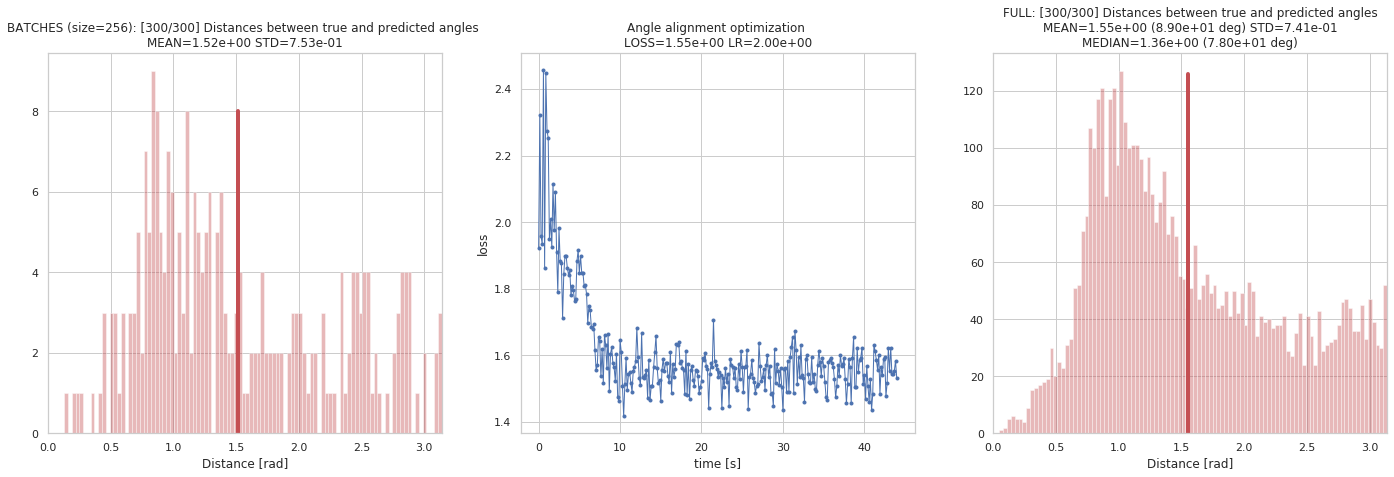

step 30/300 (4s): loss = 1.98e+00
step 60/300 (9s): loss = 1.71e+00
step 90/300 (13s): loss = 1.55e+00
step 120/300 (17s): loss = 1.56e+00
step 150/300 (22s): loss = 1.55e+00
step 180/300 (26s): loss = 1.54e+00
step 210/300 (30s): loss = 1.53e+00
step 240/300 (36s): loss = 1.56e+00
step 270/300 (41s): loss = 1.55e+00
step 300/300 (45s): loss = 1.55e+00



In [4]:
m, a_R, losses, collect_data, trajectory = training_angle_alignment(num_runs=3, 
                                                        steps=300, 
                                                        batch_size=256, 
                                                        optimizer=Ftrl(learning_rate=2., learning_rate_power=-2.), 
                                                        angles_true=angles_true, 
                                                        angles_predicted=angles_predicted)

In [29]:
plot_iterations_polar_plot(collect_data, angles_true, interval=200, connections=False, selected=None)

(30, 5000, 3)


![](../images/estimated0.5_5.gif)

In [35]:
plot_iterations_rotvec(collect_data, angles_true, interval=200)

![](../images/estimated0.5_6.gif)

---

## 1.2. Limit 2.0

In [66]:
data = np.load("3-reconstruction/data/angle_recovery_estimated_le2_50k.npz")
q_predicted, losses, q_all = data["arr_0"], data["arr_1"], data["arr_2"]

angles_predicted = quaternion2euler(q_predicted)

In [45]:
plot_images(angles_predicted, projections, indices=range(100), img_size_scale=0.05)

![](../images/estimated2.0_1.gif)

In [38]:
plot_iterations_polar_plot(q_all, angles_true, interval=1, connections=False, selected=None)

(1524, 5000, 3)


![](../images/estimated2.0_2.gif)

In [40]:
plot_iterations_rotvec(q_all, angles_true, interval=1)

![](../images/estimated2.0_3.gif)

In [41]:
plot_euclidean_space(angles_predicted)

![](../images/estimated2.0_4.gif)

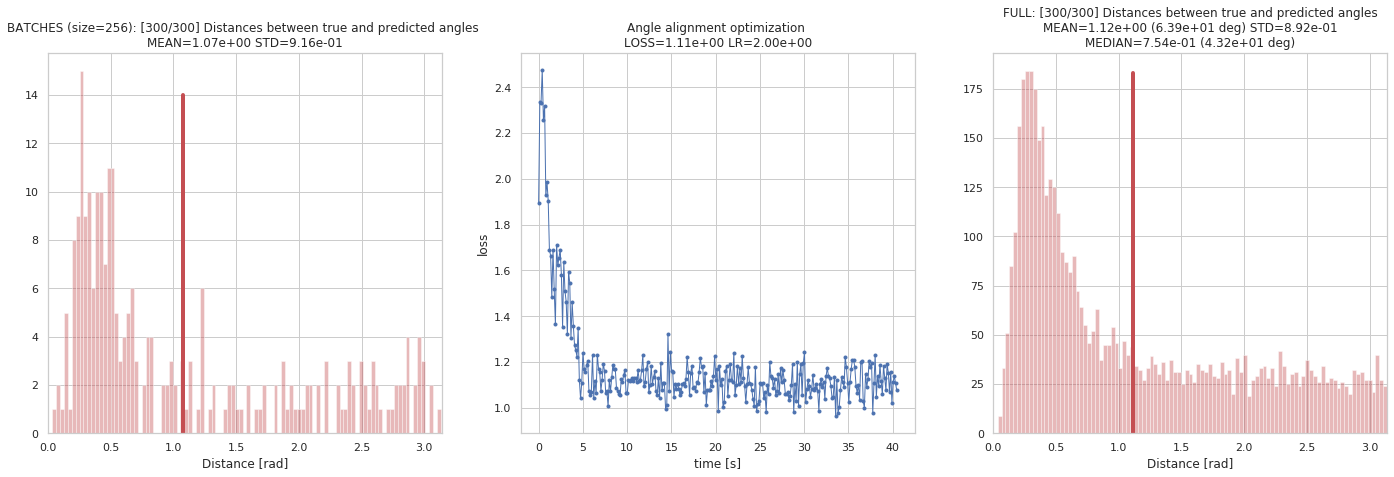

step 30/300 (4s): loss = 1.73e+00
step 60/300 (8s): loss = 1.15e+00
step 90/300 (12s): loss = 1.12e+00
step 120/300 (17s): loss = 1.12e+00
step 150/300 (21s): loss = 1.12e+00
step 180/300 (25s): loss = 1.12e+00
step 210/300 (29s): loss = 1.09e+00
step 240/300 (33s): loss = 1.10e+00
step 270/300 (37s): loss = 1.11e+00
step 300/300 (41s): loss = 1.12e+00



In [67]:
m, a_R, losses, collect_data, trajectory = training_angle_alignment(num_runs=3, 
                                                        steps=300, 
                                                        batch_size=256, 
                                                        optimizer=Ftrl(learning_rate=2., learning_rate_power=-2.), 
                                                        angles_true=angles_true, 
                                                        angles_predicted=angles_predicted)

In [68]:
losses[-1], m

(1.0768701658340565, [1.0, 1.0, 1.0, -1.0])

In [69]:
from cryoem.angle_recovery import angles_transpose
from cryoem.angle_alignment import update_quaternion

In [79]:
collect_data_T = np.zeros(collect_data.shape)
for i, iteration in enumerate(collect_data):
    collect_data_T[i] = update_quaternion(m, [tf.Variable([0., 0., 0., 0., 0., 0.])], iteration)  

In [80]:
plot_iterations_polar_plot(collect_data_T, angles_true, interval=200, connections=False, selected=None)

(30, 5000, 3)


![](../images/estimated2.0_5.gif)

In [83]:
plot_iterations_rotvec(collect_data_T, angles_true, interval=200)

![](../images/estimated2.0_6.gif)

---

## 1.3. Limit 2.5

In [3]:
data = np.load("3-reconstruction/data/angle_recovery_limited2.5_estimated_50k.npz")
q_predicted, losses, q_all = data["arr_0"], data["arr_1"], data["arr_2"]

angles_predicted = quaternion2euler(q_predicted)

In [4]:
plot_images(angles_predicted, projections, indices=range(100), img_size_scale=0.05)

![](../images/estimated2.5_1.gif)

In [5]:
plot_euclidean_space(angles_predicted)

![](../images/estimated2.5_2.gif)

In [6]:
plot_iterations_polar_plot(q_all, angles_true, interval=1, connections=False, selected=None)

![](../images/estimated2.5_3.gif)

In [7]:
plot_iterations_rotvec(q_all, angles_true, interval=1)

![](../images/estimated2.5_4.gif)

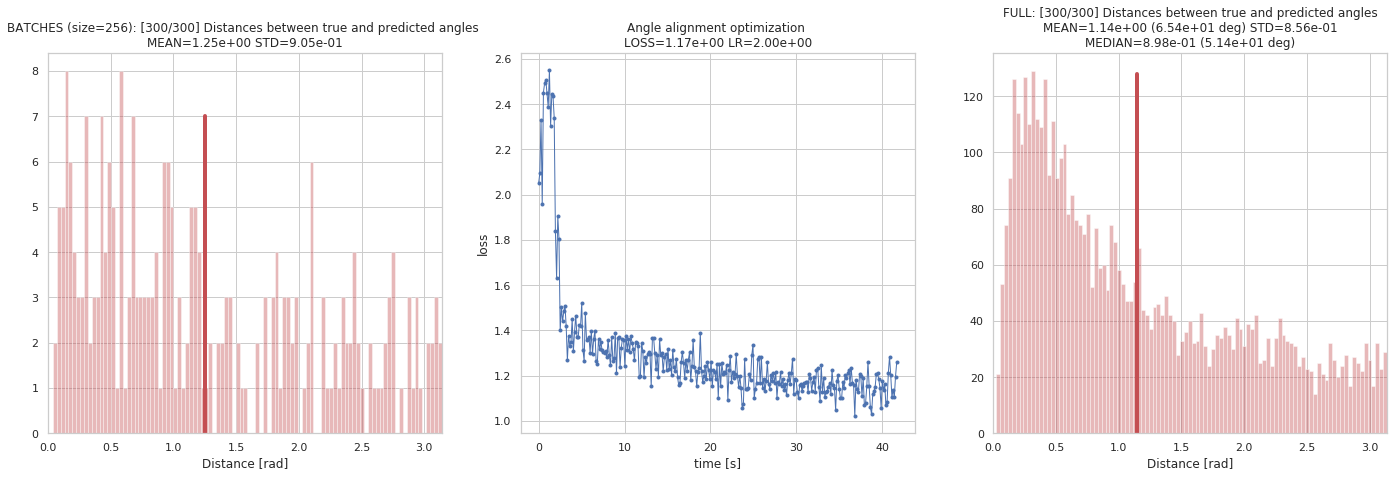

step 30/300 (4s): loss = 1.91e+00
step 60/300 (9s): loss = 1.35e+00
step 90/300 (13s): loss = 1.31e+00
step 120/300 (17s): loss = 1.26e+00
step 150/300 (22s): loss = 1.23e+00
step 180/300 (26s): loss = 1.19e+00
step 210/300 (30s): loss = 1.18e+00
step 240/300 (34s): loss = 1.17e+00
step 270/300 (38s): loss = 1.16e+00
step 300/300 (43s): loss = 1.14e+00



In [8]:
m, a_R, losses, collect_data, trajectory = training_angle_alignment(num_runs=3, 
                                                        steps=300, 
                                                        batch_size=256, 
                                                        optimizer=Ftrl(learning_rate=2., learning_rate_power=-2.), 
                                                        angles_true=angles_true, 
                                                        angles_predicted=angles_predicted)

In [9]:
plot_iterations_polar_plot(collect_data, angles_true, interval=200, connections=False, selected=None)

![](../images/estimated2.5_5.gif)

In [10]:
plot_iterations_rotvec(collect_data, angles_true, interval=200)

![](../images/estimated2.5_6.gif)

---

## 1.4. Limit 3.14

In [3]:
data = np.load("3-reconstruction/data/angle_recovery_limited3.14_estimated_50k.npz")
q_predicted, losses, q_all = data["arr_0"], data["arr_1"], data["arr_2"]

angles_predicted = quaternion2euler(q_predicted)

In [4]:
plot_images(angles_predicted, projections, indices=range(100), img_size_scale=0.05)

![](../images/estimated3.14_1.gif)

In [5]:
plot_euclidean_space(angles_predicted)

![](../images/estimated3.14_2.gif)

In [6]:
plot_iterations_polar_plot(q_all, angles_true, interval=1, connections=False, selected=None)

![](../images/estimated3.14_3.gif)

In [7]:
plot_iterations_rotvec(q_all, angles_true, interval=1)

![](../images/estimated3.14_4.gif)

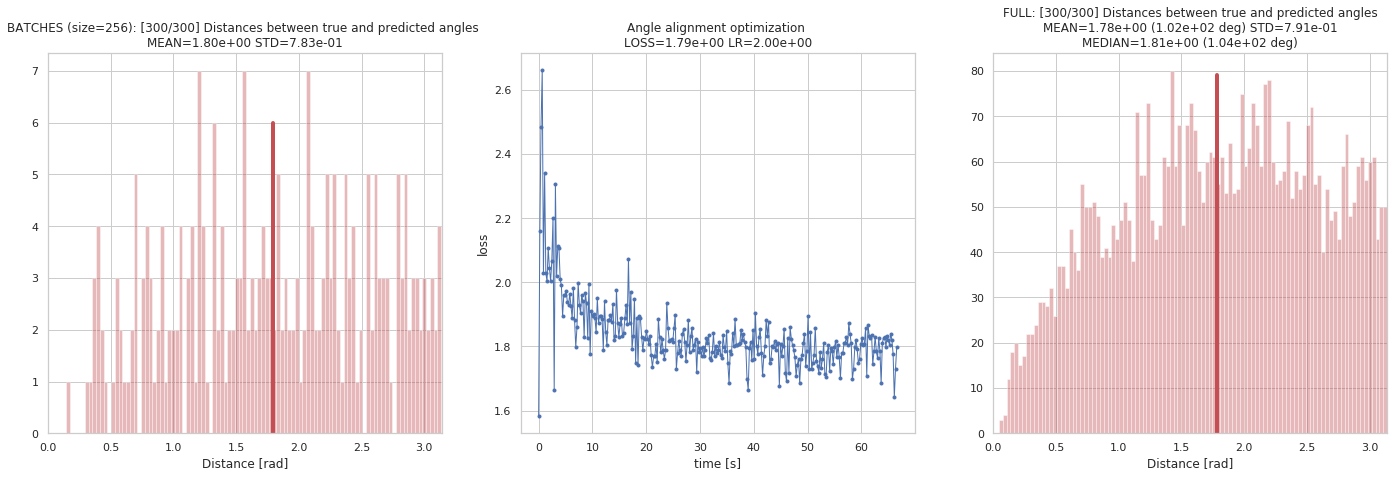

step 30/300 (6s): loss = 2.05e+00
step 60/300 (12s): loss = 1.89e+00
step 90/300 (20s): loss = 1.87e+00
step 120/300 (28s): loss = 1.81e+00
step 150/300 (36s): loss = 1.80e+00
step 180/300 (43s): loss = 1.79e+00
step 210/300 (51s): loss = 1.80e+00
step 240/300 (57s): loss = 1.78e+00
step 270/300 (62s): loss = 1.78e+00
step 300/300 (68s): loss = 1.80e+00



In [8]:
m, a_R, losses, collect_data, trajectory = training_angle_alignment(num_runs=3, 
                                                        steps=300, 
                                                        batch_size=256, 
                                                        optimizer=Ftrl(learning_rate=2., learning_rate_power=-2.), 
                                                        angles_true=angles_true, 
                                                        angles_predicted=angles_predicted)

In [9]:
plot_iterations_polar_plot(collect_data, angles_true, interval=200, connections=False, selected=None)

![](../images/estimated3.14_5.gif)

In [10]:
plot_iterations_rotvec(collect_data, angles_true, interval=200)

![](../images/estimated3.14_6.gif)

---

# 2. Perfect Distances + Variance 0.2

## 2.1. Limit 0.5  TODO

In [19]:
data = np.load("3-reconstruction/data/ar_perfect_le0.5_50k_var0.2.npz")
q_predicted, losses, q_all = data["arr_0"], data["arr_1"], data["arr_2"]

angles_predicted = quaternion2euler(q_predicted)

In [20]:
plot_images(angles_predicted, projections, indices=range(100), img_size_scale=0.05)

![](../images/perfect0.5_var0.2_1.gif)

In [21]:
plot_iterations_polar_plot(q_all, angles_true, interval=1, connections=False, selected=None)

![](../images/perfect0.5_var0.2_2.gif)

In [22]:
plot_iterations_rotvec(q_all, angles_true, interval=1)

![](../images/perfect0.5_var0.2_3.gif)

In [23]:
plot_euclidean_space(angles_predicted)

![](../images/perfect0.5_var0.2_4.gif)

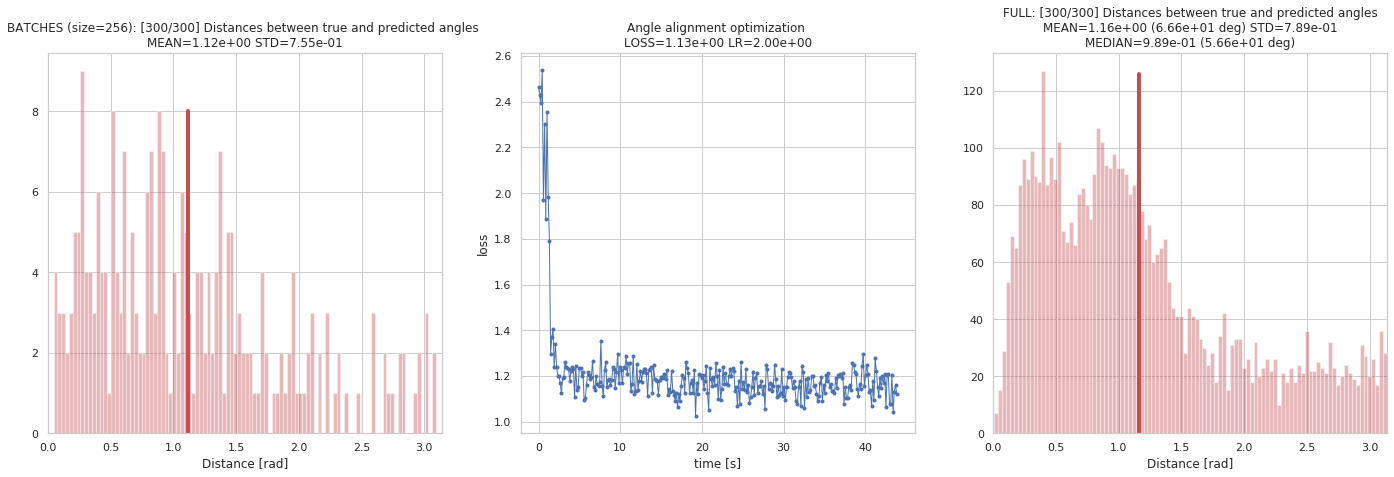

step 30/300 (5s): loss = 1.58e+00
step 60/300 (9s): loss = 1.19e+00
step 90/300 (15s): loss = 1.21e+00
step 120/300 (19s): loss = 1.17e+00
step 150/300 (23s): loss = 1.18e+00
step 180/300 (28s): loss = 1.17e+00
step 210/300 (32s): loss = 1.16e+00
step 240/300 (36s): loss = 1.15e+00
step 270/300 (41s): loss = 1.17e+00
step 300/300 (45s): loss = 1.17e+00



In [24]:
m, a_R, losses, collect_data, trajectory = training_angle_alignment(num_runs=3, 
                                                        steps=300, 
                                                        batch_size=256, 
                                                        optimizer=Ftrl(learning_rate=2., learning_rate_power=-2.), 
                                                        angles_true=angles_true, 
                                                        angles_predicted=angles_predicted)

In [25]:
plot_iterations_polar_plot(collect_data, angles_true, interval=200, connections=False, selected=None)

![](../images/perfect0.5_var0.2_5.gif)

In [26]:
plot_iterations_rotvec(collect_data, angles_true, interval=200)

![](../images/perfect0.5_var0.2_6.gif)

---

## 2.2. Limit 2.5

In [11]:
data = np.load("3-reconstruction/data/ar_perfect_le2.5_50k_var0.2.npz")
q_predicted, losses, q_all = data["arr_0"], data["arr_1"], data["arr_2"]

angles_predicted = quaternion2euler(q_predicted)

In [12]:
plot_images(angles_predicted, projections, indices=range(100), img_size_scale=0.05)

![](../images/perfect2.5_var0.2_1.gif)

In [13]:
plot_iterations_polar_plot(q_all, angles_true, interval=1, connections=False, selected=None)

![](../images/perfect2.5_var0.2_2.gif)

In [14]:
plot_iterations_rotvec(q_all, angles_true, interval=1)

![](../images/perfect2.5_var0.2_3.gif)

In [15]:
plot_euclidean_space(angles_predicted)

![](../images/perfect2.5_var0.2_4.gif)

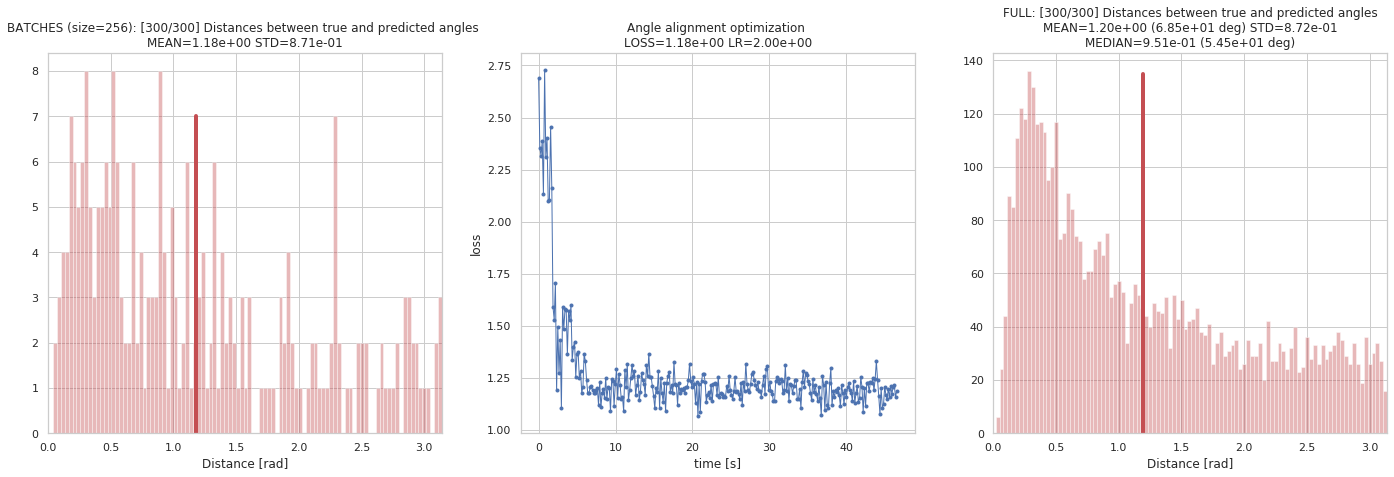

step 30/300 (5s): loss = 1.83e+00
step 60/300 (10s): loss = 1.23e+00
step 90/300 (15s): loss = 1.21e+00
step 120/300 (21s): loss = 1.21e+00
step 150/300 (25s): loss = 1.20e+00
step 180/300 (30s): loss = 1.20e+00
step 210/300 (34s): loss = 1.22e+00
step 240/300 (39s): loss = 1.20e+00
step 270/300 (43s): loss = 1.18e+00
step 300/300 (48s): loss = 1.19e+00



In [16]:
m, a_R, losses, collect_data, trajectory = training_angle_alignment(num_runs=3, 
                                                        steps=300, 
                                                        batch_size=256, 
                                                        optimizer=Ftrl(learning_rate=2., learning_rate_power=-2.), 
                                                        angles_true=angles_true, 
                                                        angles_predicted=angles_predicted)

In [17]:
plot_iterations_polar_plot(collect_data, angles_true, interval=200, connections=False, selected=None)

![](../images/perfect2.5_var0.2_5.gif)

In [18]:
plot_iterations_rotvec(collect_data, angles_true, interval=200)

![](../images/perfect2.5_var0.2_6.gif)

---

# 3. Perfect Distances + Variance 0.8

## 3.1. Limit 0.5

In [47]:
data = np.load("3-reconstruction/data/ar_perfect_le0.5_50k.npz")
q_predicted, losses, q_all = data["arr_0"], data["arr_1"], data["arr_2"]

angles_predicted = quaternion2euler(q_predicted)

In [48]:
plot_images(angles_predicted, projections, indices=range(100), img_size_scale=0.05)

![](../images/perfect0.5_1.gif)

In [49]:
plot_iterations_polar_plot(q_all, angles_true, interval=1, connections=False, selected=None)

(741, 5000, 3)


![](../images/perfect0.5_2.gif)

In [51]:
plot_iterations_rotvec(q_all, angles_true, interval=1)

![](../images/perfect0.5_3.gif)

In [52]:
plot_euclidean_space(angles_predicted)

![](../images/perfect0.5_4.gif)

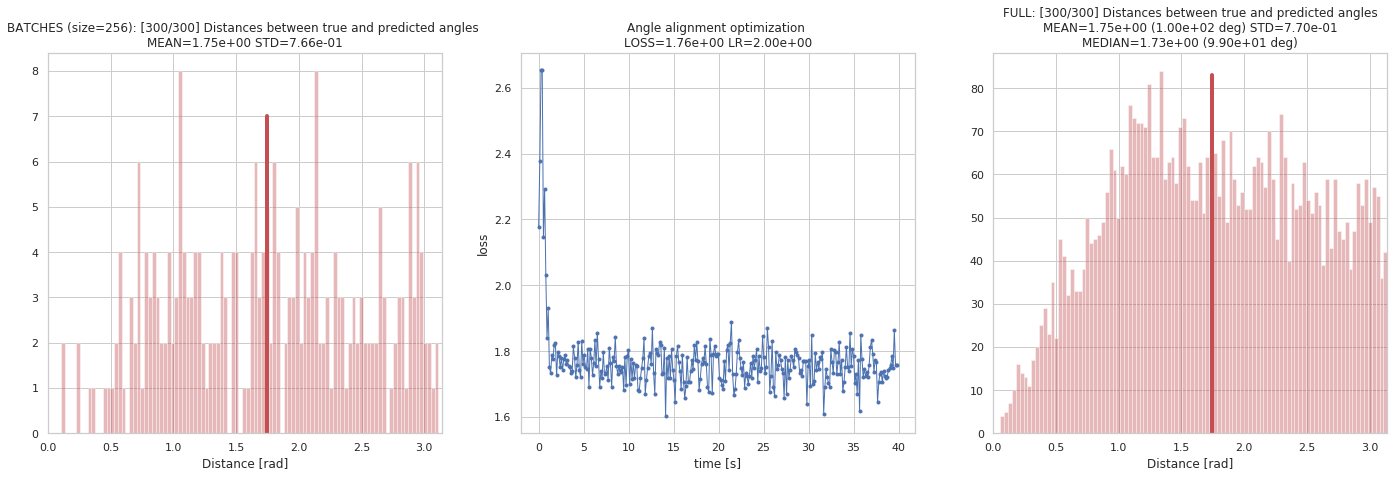

step 30/300 (4s): loss = 1.91e+00
step 60/300 (8s): loss = 1.76e+00
step 90/300 (12s): loss = 1.75e+00
step 120/300 (17s): loss = 1.76e+00
step 150/300 (21s): loss = 1.75e+00
step 180/300 (25s): loss = 1.75e+00
step 210/300 (29s): loss = 1.76e+00
step 240/300 (33s): loss = 1.75e+00
step 270/300 (37s): loss = 1.75e+00
step 300/300 (41s): loss = 1.75e+00



In [53]:
m, a_R, losses, collect_data, trajectory = training_angle_alignment(num_runs=3, 
                                                        steps=300, 
                                                        batch_size=256, 
                                                        optimizer=Ftrl(learning_rate=2., learning_rate_power=-2.), 
                                                        angles_true=angles_true, 
                                                        angles_predicted=angles_predicted)

In [54]:
plot_iterations_polar_plot(collect_data, angles_true, interval=200, connections=False, selected=None)

(30, 5000, 3)


![](../images/perfect0.5_5.gif)

In [55]:
plot_iterations_rotvec(collect_data, angles_true, interval=200)

![](../images/perfect0.5_6.gif)

---

## 3.2. Limit 2.5

In [56]:
data = np.load("3-reconstruction/data/ar_perfect_le2.5_50k.npz")
q_predicted, losses, q_all = data["arr_0"], data["arr_1"], data["arr_2"]

angles_predicted = quaternion2euler(q_predicted)

In [57]:
plot_images(angles_predicted, projections, indices=range(100), img_size_scale=0.05)

![](../images/perfect2.5_1.gif)

In [58]:
plot_iterations_polar_plot(q_all, angles_true, interval=1, connections=False, selected=None)

(1189, 5000, 3)


![](../images/perfect2.5_2.gif)

In [60]:
plot_iterations_rotvec(q_all, angles_true, interval=1)

![](../images/perfect2.5_3.gif)

In [61]:
plot_euclidean_space(angles_predicted)

![](../images/perfect2.5_4.gif)

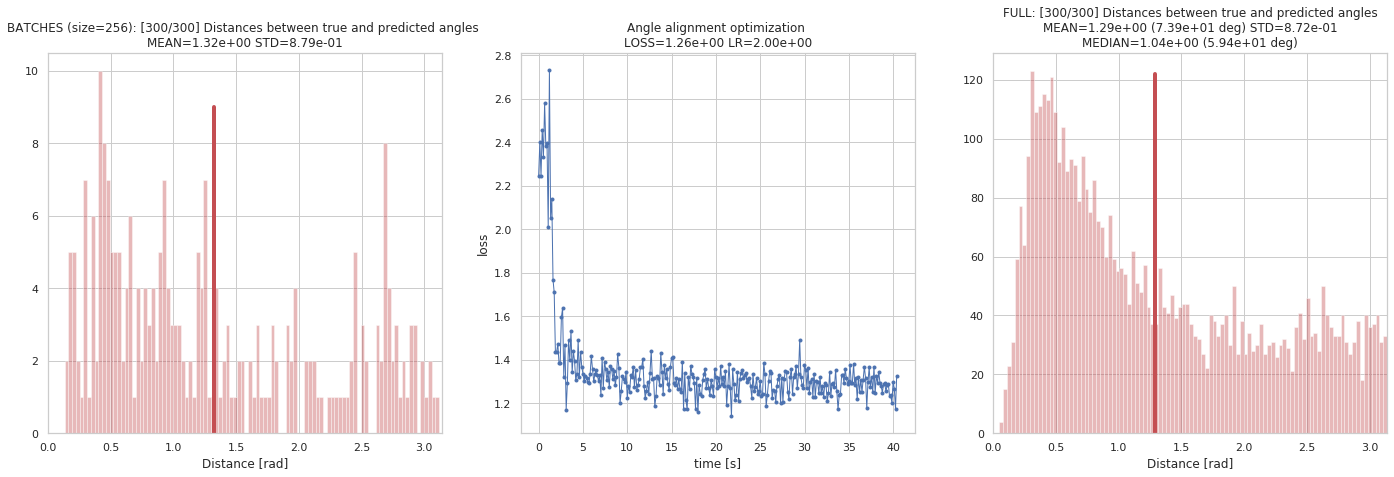

step 30/300 (4s): loss = 1.82e+00
step 60/300 (8s): loss = 1.34e+00
step 90/300 (12s): loss = 1.32e+00
step 120/300 (16s): loss = 1.31e+00
step 150/300 (21s): loss = 1.28e+00
step 180/300 (25s): loss = 1.29e+00
step 210/300 (29s): loss = 1.28e+00
step 240/300 (33s): loss = 1.31e+00
step 270/300 (37s): loss = 1.29e+00
step 300/300 (41s): loss = 1.28e+00



In [62]:
m, a_R, losses, collect_data, trajectory = training_angle_alignment(num_runs=3, 
                                                        steps=300, 
                                                        batch_size=256, 
                                                        optimizer=Ftrl(learning_rate=2., learning_rate_power=-2.), 
                                                        angles_true=angles_true, 
                                                        angles_predicted=angles_predicted)

In [63]:
plot_iterations_polar_plot(collect_data, angles_true, interval=200, connections=False, selected=None)

(30, 5000, 3)


![](../images/perfect2.5_5.gif)

In [64]:
plot_iterations_rotvec(collect_data, angles_true, interval=200)

![](../images/perfect2.5_6.gif)

---